In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, hstack, vstack
from clevar.catalog import ClCatalog
from numpy.ma import masked
import sys
from clevar.match import output_matched_catalog

In [2]:
supertable = Table.read('/sps/lsst/groups/clusters/amico_validation_project/catalogs/matching_cats/supercatalog.fits')

In [3]:
inpath = '/sps/lsst/groups/clusters/amico_validation_project/catalogs/matching_cats/'

In [4]:
c_merged_12 = Table.read(inpath + 'amico_redmapper/' + 'output_catalog_' + 'ls2030_z115' + '.fits')
c_merged_13 = Table.read(inpath + 'amico_cosmoDC2/' + 'output_catalog_' + 'ls20_z115' + '.fits')
c_merged_23 = Table.read(inpath + 'redmapper_cosmoDC2/' + 'output_catalog_' + 'ls20_z115' + '.fits')

In [5]:
supertable

cat12-1_id,cat12-1_ra,cat12-1_dec,cat12-1_z,cat12-1_mass,cat12-1_mt_self,cat12-1_mt_other,cat12-1_mt_multi_self,cat12-1_mt_multi_other,cat12-1_mt_cross,cat12-2_id,cat12-2_ra,cat12-2_dec,cat12-2_z,cat12-2_mass,cat12-2_z_true,cat12-2_log_mass,cat12-2_mt_self,cat12-2_mt_other,cat12-2_mt_multi_self,cat12-2_mt_multi_other,cat12-2_mt_cross,cat13-1_id,cat13-1_ra,cat13-1_dec,cat13-1_z,cat13-1_mass,cat13-1_mt_self,cat13-1_mt_other,cat13-1_mt_multi_self,cat13-1_mt_multi_other,cat13-1_mt_cross,cat13-3_id,cat13-3_ra,cat13-3_dec,cat13-3_z,cat13-3_mass,cat13-3_log_mass,cat13-3_mt_self,cat13-3_mt_other,cat13-3_mt_multi_self,cat13-3_mt_multi_other,cat13-3_mt_cross,cat23-2_id,cat23-2_ra,cat23-2_dec,cat23-2_z,cat23-2_mass,cat23-2_z_true,cat23-2_log_mass,cat23-2_mt_self,cat23-2_mt_other,cat23-2_mt_multi_self,cat23-2_mt_multi_other,cat23-2_mt_cross,cat23-3_id,cat23-3_ra,cat23-3_dec,cat23-3_z,cat23-3_mass,cat23-3_log_mass,cat23-3_mt_self,cat23-3_mt_other,cat23-3_mt_multi_self,cat23-3_mt_multi_other,cat23-3_mt_cross
bytes32,float64,float64,float64,float64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes6,float64,float64,float32,float64,bytes13,bytes13,bytes123,bytes123,bytes13,bytes21,float64,float64,float64,float64,float64,bytes5,bytes5,bytes11,bytes11,bytes5,bytes32,float64,float64,float64,float64,float64,float64,bytes32,bytes32,bytes95,bytes95,bytes32,bytes32,float64,float64,float64,float64,float64,bytes32,bytes32,bytes32,bytes32,bytes32
1,61.379151,-39.997938,0.7599999904632568,151.05119,16,16,16,16,16,16,61.38091042723989,-39.995134303962544,0.7516999840736389,167.76316833496094,0.752255380153656,2.224696636199951,1,1,1,1,1,1,61.379151,-39.997938,0.76,151.05119,935700155279,935700155279,935700155279,935700155279,935700155279,935700155279,61.38091042723989,-39.995134303962544,0.7522553689872022,1328346332168653.5,15.123311320920747,1,1,1,1,1,26,67.04118044229672,-36.65553761954279,0.9107077717781067,140.76185607910156,0.9010045528411865,2.148484945297241,1780800129259,1780800129259,"230300129235,1730400129259,1780800129259","230300129235,1730400129259,1780800129259",1780800129259,1780800129259,67.04118044229672,-36.65553761954279,0.9010045725149554,528315382515740.9,14.72289325585909,26,26,26,26,26
2,61.751903,-39.598934,0.38999998569488525,34.635494,1448,1448,1448,1448,1448,1448,61.75471518763446,-39.59505755309435,0.3823624551296234,40.7655029296875,0.37716925144195557,1.6102927923202515,2,2,2,2,2,2,61.751903,-39.598934,0.39,34.635494,268600155355,268600155355,268600155355,268600155355,268600155355,268600155355,61.75471518763446,-39.59505755309435,0.3771692378505265,455114262418388.75,14.658120445685581,2,2,2,2,2,54,68.58519520148329,-37.06286568615487,0.5412348508834839,117.28445434570312,0.5372703075408936,2.0692405700683594,68900129323,68900129323,68900129323,68900129323,68900129323,68900129323,68.58519520148329,-37.06286568615487,0.5372703073067269,361786839559211.3,14.55845276481576,54,54,54,54,54
3,62.020461,-40.78391,0.7599999904632568,65.485061,492,492,492,492,492,492,62.01743687819776,-40.78463556638627,0.750578761100769,56.295066833496094,0.7545040249824524,1.7504703998565674,3,3,3,3,3,3,62.020461,-40.78391,0.76,65.485061,1617600155279,1617600155279,1617600155279,1617600155279,1617600155279,1617600155279,62.01743687819776,-40.78463556638627,0.7545040319883065,265194735875605.66,14.423564899058276,3,3,3,3,3,93,66.52163526817355,-40.49730464002901,0.5698791146278381,106.65174102783203,0.5711850523948669,2.027967929840088,804700157315,804700157315,"155300157307,804700157315,1471200157307","155300157307,804700157315,1471200157307",804700157315,804700157315,66.52163526817355,-40.49730464002901,0.5711850461607995,378651013523831.0,14.578239123625224,93,93,93,93,93
4,62.622221,-40.86162,0.25999999046325684,35.691697,1912,1912,1912,1912,1912,1912,62.62391149797296,-40.859322057033374,0.2515519857406616,32.28373718261719,0.24752603471279144,1.5089838

In [6]:
c_merged_12

cat1_id,cat1_ra,cat1_dec,cat1_z,cat1_mass,cat1_mt_self,cat1_mt_other,cat1_mt_multi_self,cat1_mt_multi_other,cat1_mt_cross,cat2_id,cat2_ra,cat2_dec,cat2_z,cat2_mass,cat2_z_true,cat2_log_mass,cat2_mt_self,cat2_mt_other,cat2_mt_multi_self,cat2_mt_multi_other,cat2_mt_cross
bytes6,float64,float64,float32,float64,bytes4,bytes4,bytes9,bytes9,bytes4,bytes11,float64,float64,float32,float32,float32,float64,bytes5,bytes5,bytes11,bytes11,bytes5
1,61.379151,-39.997938,0.76,151.05119,16,16,16,16,16,16,61.38091042723989,-39.995134303962544,0.7517,167.76317,0.7522554,2.224696636199951,1,1,1,1,1
2,61.751903,-39.598934,0.39,34.635494,1448,1448,1448,1448,1448,1448,61.75471518763446,-39.59505755309435,0.38236246,40.765503,0.37716925,1.6102927923202515,2,2,2,2,2
3,62.020461,-40.78391,0.76,65.485061,492,492,492,492,492,492,62.01743687819776,-40.78463556638627,0.75057876,56.295067,0.754504,1.7504703998565674,3,3,3,3,3
4,62.622221,-40.86162,0.26,35.691697,1912,1912,1912,1912,1912,1912,62.62391149797296,-40.859322057033374,0.251552,32.283737,0.24752603,1.508983850479126,4,4,4,4,4
5,61.527245,-40.393481,0.74,49.109488,4404,4404,4404,4404,4404,4404,61.52591531079437,-40.39118186782393,0.730846,22.764635,0.7390331,1.3572607040405273,5,5,5,5,5
10,60.878596,-39.859705,0.68,37.570579,3439,3439,3439,3439,3439,3439,60.87741835265462,-39.858968192067366,0.679304,26.410574,0.67976,1.4217778444290161,10,10,10,10,10
11,61.029395,-39.780903,0.76,36.01472,1230,1230,1230,1230,1230,1230,61.02810666067245,-39.781242334880226,0.75806963,29.080194,0.7519243,1.463597297668457,11,11,11,11,11
12,61.907955,-40.268995,0.65,30.147303,4395,4395,4395,4395,4395,4395,61.91299450100855,-40.270174337648726,0.65890455,23.1155,0.6525463,1.363903284072876,12,12,12,12,12
17,61.337421,-41.147773,1.12,57.665355,774,774,774,774,774,774,61.33376537845904,-41.149061500486695,1.1162368,37.638237,1.1166432,1.5756292343139648,17,17,17,17,17


In [8]:
supertable12 = supertable[supertable['cat12-1_z']>0]
supertable13 = supertable[supertable['cat13-1_z']>0]
supertable23 = supertable[supertable['cat23-2_z']>0]

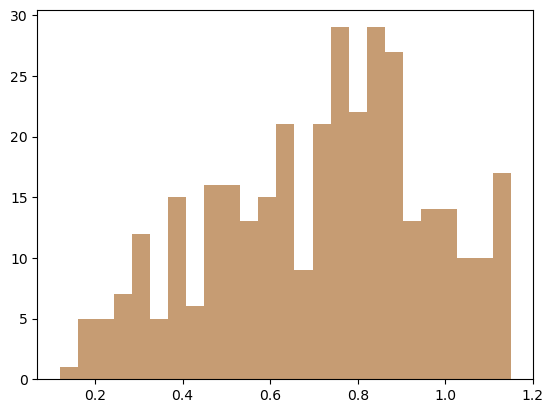

In [9]:
plt.hist(supertable12['cat12-1_z'], bins = 25, alpha = .5)
plt.hist(c_merged_12['cat1_z'], bins = 25, alpha = .5)
plt.show()

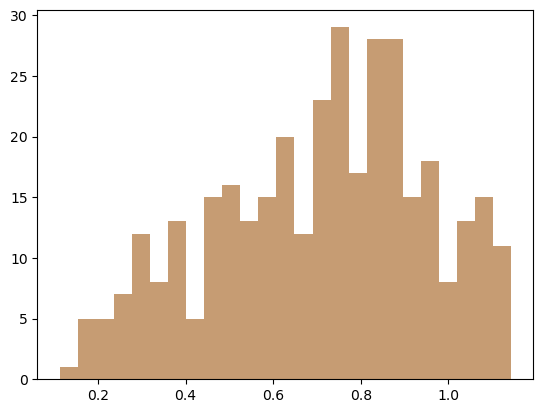

In [10]:
plt.hist(supertable12['cat12-2_z'], bins = 25, alpha = .5)
plt.hist(c_merged_12['cat2_z'], bins = 25, alpha = .5)
plt.show()

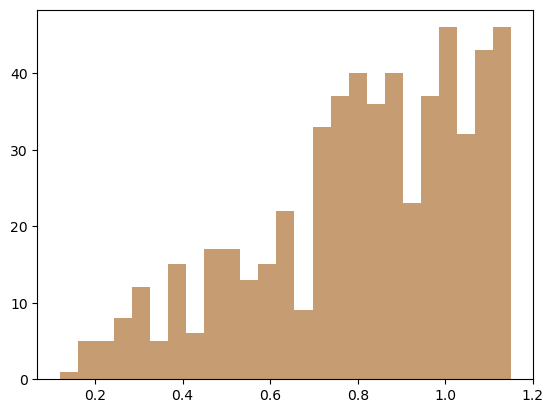

In [11]:
plt.hist(supertable13['cat13-1_z'], bins = 25, alpha = .5)
plt.hist(c_merged_13['cat1_z'], bins = 25, alpha = .5)
plt.show()

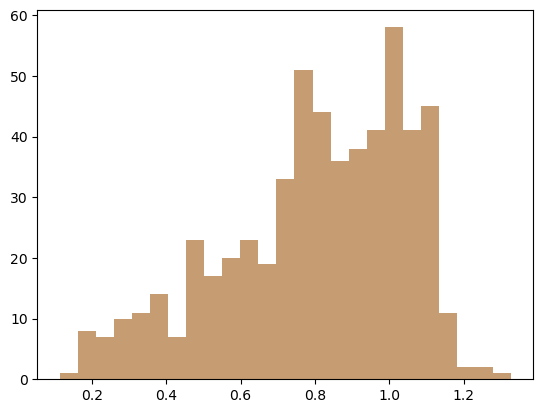

In [18]:
plt.hist(supertable13['cat13-3_z'], bins = 25, alpha = .5)
plt.hist(c_merged_13['cat2_z'], bins = 25, alpha = .5)
plt.show()

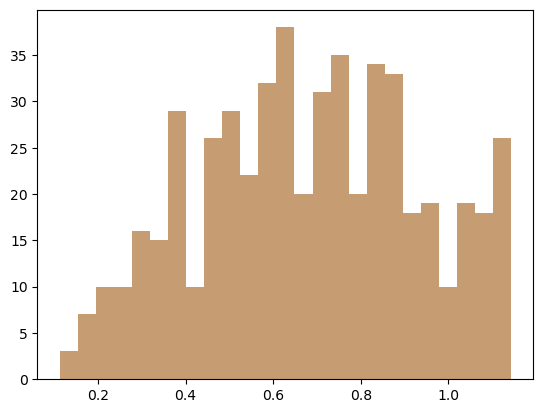

In [19]:
plt.hist(supertable23['cat23-2_z'], bins = 25, alpha = .5)
plt.hist(c_merged_23['cat1_z'], bins = 25, alpha = .5)
plt.show()

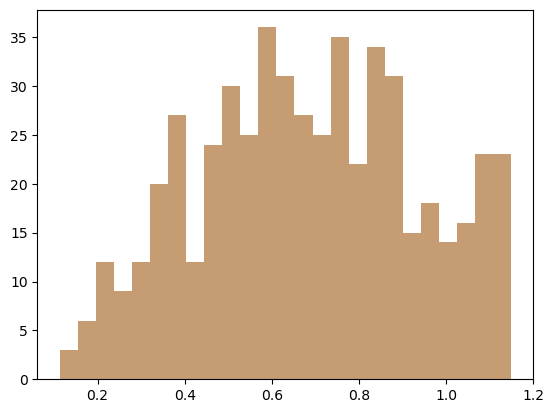

In [21]:
plt.hist(supertable23['cat23-3_z'], bins = 25, alpha = .5)
plt.hist(c_merged_23['cat2_z'], bins = 25, alpha = .5)
plt.show()

In [27]:
len(supertable12['cat12-1_mt_cross']), len(supertable12['cat12-2_mt_cross']), len(c_merged_12['cat1_mt_cross'])

(352, 352, 352)

In [28]:
len(supertable13['cat13-1_mt_cross']), len(supertable13['cat13-3_mt_cross']), len(c_merged_13['cat2_mt_cross'])

(563, 563, 563)

In [29]:
len(supertable23['cat23-2_mt_cross']), len(supertable23['cat23-3_mt_cross']), len(c_merged_23['cat1_mt_cross'])

(530, 530, 530)

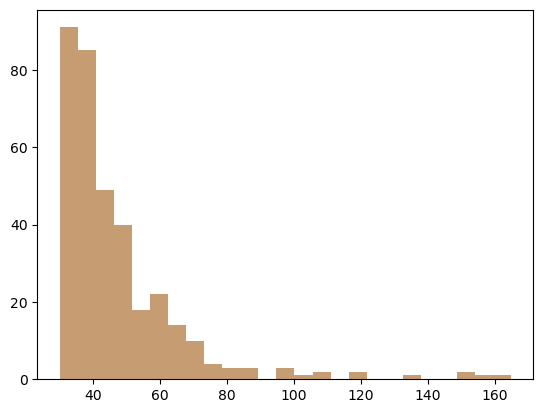

In [30]:
plt.hist(supertable12['cat12-1_mass'], bins = 25, alpha = .5)
plt.hist(c_merged_12['cat1_mass'], bins = 25, alpha = .5)
plt.show()

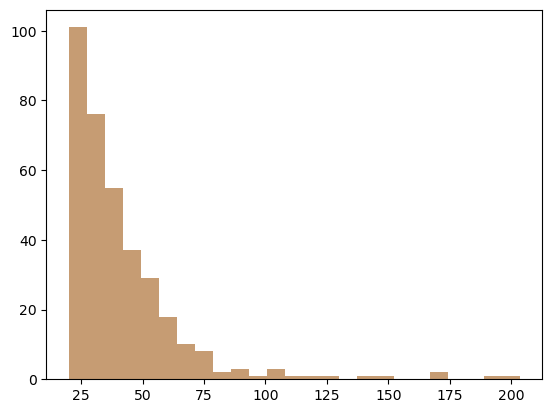

In [31]:
plt.hist(supertable12['cat12-2_mass'], bins = 25, alpha = .5)
plt.hist(c_merged_12['cat2_mass'], bins = 25, alpha = .5)
plt.show()

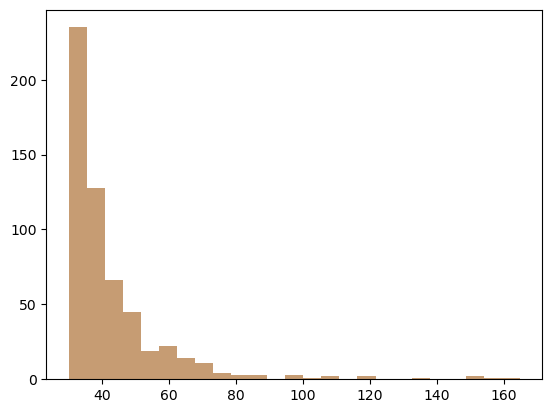

In [32]:
plt.hist(supertable13['cat13-1_mass'], bins = 25, alpha = .5)
plt.hist(c_merged_13['cat1_mass'], bins = 25, alpha = .5)
plt.show()

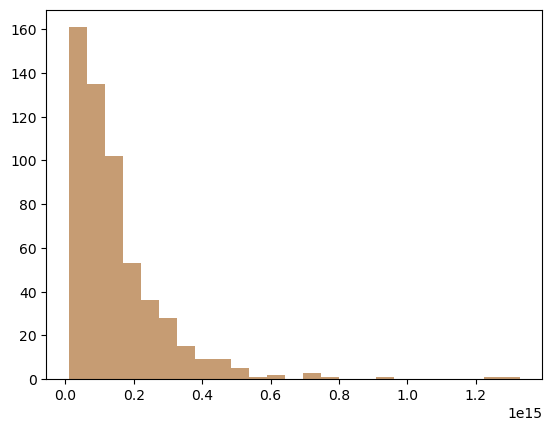

In [33]:
plt.hist(supertable13['cat13-3_mass'], bins = 25, alpha = .5)
plt.hist(c_merged_13['cat2_mass'], bins = 25, alpha = .5)
plt.show()

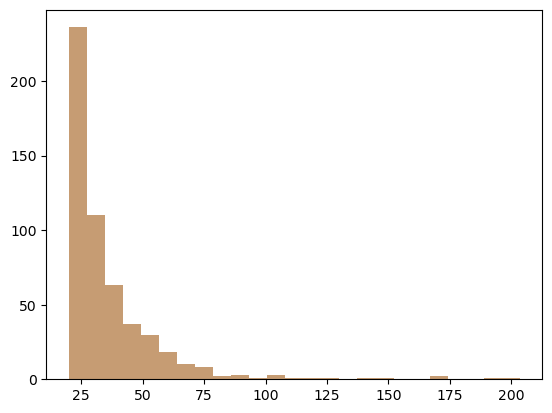

In [34]:
plt.hist(supertable23['cat23-2_mass'], bins = 25, alpha = .5)
plt.hist(c_merged_23['cat1_mass'], bins = 25, alpha = .5)
plt.show()

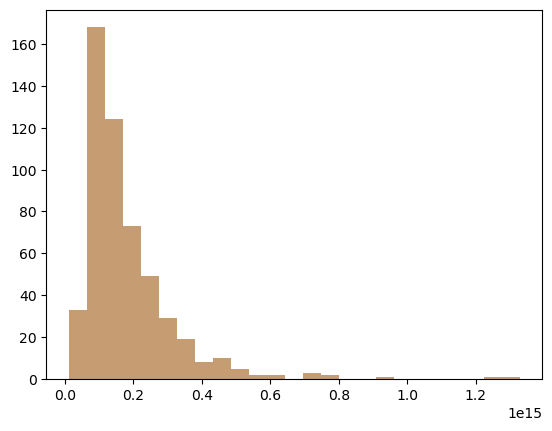

In [35]:
plt.hist(supertable23['cat23-3_mass'], bins = 25, alpha = .5)
plt.hist(c_merged_23['cat2_mass'], bins = 25, alpha = .5)
plt.show()